## 題目說明:
   
       本次作業使用Kaggle上，預測「鐵達尼號存活率」的，非常經典的例子，請先下載本檔案做使用，需要把這個檔案放在跟 jupyter notebook同一個資料夾才讀取的到。   
   
      我們今天的目標，是利用其中的「性別 Sex」跟「年齡 Age」來預測「存活與否 Survived」(1是存活，0則否）。   
   
1.  首先，請使用pandas套件讀檔   
   
2.  請取出所有的Age跟Sex作為題目，和Survived做為答案並分成三個同名的numpy array。 (提示： Age.shape = (891, ))   
   
3.  其中，由於Age有一些值是空值NaN，請把這些空值都先換成0。提示： 可使用 np.isnan(某個你想確認是不是NaN的年齡) ）   
   
4.  再來，Sex部分因為都是文字，不方便我們做svm，請把Male都換成0，Female都換成1    
   
5.  由於我們想把Sex跟Age都當成data，請把Sex和Age兩個array合併成一個。（提示：先用np.reshape，再用np.append）  
   
6.  實際拿svm 訓練看看，並用同樣的data，preict看看結果（這次不用分training data跟testing data）  
   
- 加分題：   
  請設計一種方法，比較看看你的預測結果，和正確答案(Survived)，找出你的「預測正確率」是多少。   

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC

### 使用pandas套件讀檔

In [2]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 取出所有的Age跟Sex作為題目，和Survived做為答案並分成三個同名的numpy array

In [3]:
df = df.loc[:,["Survived","Sex","Age"]]#用df[].value也可
Sex = np.array(df.Sex)
Age = np.array(df.Age)
Survived = np.array(df.Survived)

### 由於Age有一些值是空值NaN，請把這些空值都先換成0

In [4]:
for i in range(len(Age)):
    data = np.isnan(Age[i])
    if data == True:
        Age[i] = 0 

### Sex部分因為都是文字，不方便我們做svm，請把Male都換成0，Female都換成1

In [5]:
for i in range(len(Sex)):
    data = Sex[i]
    if data == "male":
        Sex[i] = 0
    elif data == "female":
        Sex[i] = 1

### 由於想把Sex跟Age都當成data，請把Sex和Age兩個array合併成一個。

In [6]:
Sex = np.reshape(Sex,(len(Sex),1))
Age = np.reshape(Age,(len(Age),1))
data = np.append(Sex,Age,axis = 1)

In [1]:
data

NameError: name 'data' is not defined

### 實際拿svm 訓練看看，並用同樣的data，preict看看結果（這次不用分training data跟testing data）

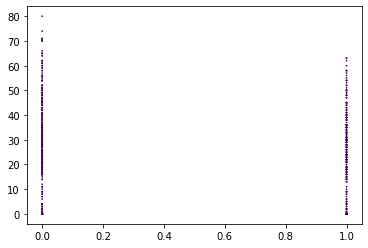

In [8]:
clf = SVC()
clf.fit(data,Survived)

x = data[:,0]
y = data[:,1]

Data = clf.predict(data)
plt.scatter(x,y,s=0.5,c=Data)

### 加分題：請設計一種方法，比較看看你的預測結果，和正確答案(Survived)，找出你的「預測正確率」是多少。

預測正確率為：61.616162％


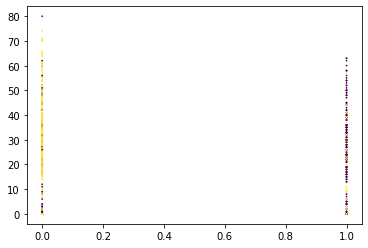

In [9]:
pre = Data-Survived
correct = np.sum(pre==0)
correct_rate = correct/len(pre)
print("預測正確率為：{:6f}％".format(correct_rate*100))
plt.scatter(x,y,s=0.5,c=pre)

### NOTE&PROBLEM

- 好悲傷的預測結果

### 補充：視覺化預測成果

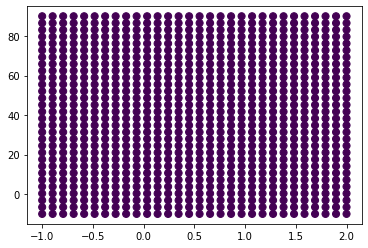

In [10]:
X, Y = np.meshgrid(np.linspace(-1,2,30), np.linspace(-10,90,30))
X = X.ravel()
Y = Y.ravel()
Z = clf.predict(list(zip(X,Y)))
plt.scatter(X, Y, s=50, c=Z)

# 自由發揮：拿股票資料玩玩看

這邊取的資料feature為本益比和年度預估ROE，  
使用excel將股票的交易資料粗略的整理，  
希望以此分類看看這個月上漲和下跌的股票。  
不過feature實在太少，結果沒麼參考價值，  
所以這邊的目的主要是再幫自己複習一次SVC的步驟而已，  
未來等能力更上層樓時再來挑戰同樣的主題～  

In [11]:
#讀檔
df_stock = pd.read_csv("StockList.csv",index_col="stocksymbol")
df_stock.head()

,ROE,PER,goup_godown
stocksymbol,,,
3008,11.9,18.1,0
3045,17.7,28.1,1
6488,29.6,27.9,0
3034,72.5,15.0,1
2884,11.3,18.3,1


In [12]:
#將資料做成array
ROE = np.array(df_stock.ROE)
PER = np.array(df_stock.PER)
go = np.array(df_stock.goup_godown)

In [13]:
#把有NaN的資料轉為0
for i in range(len(ROE)):
    data = np.isnan(ROE[i])
    if data == True:
        ROE[i] = 0 
for i in range(len(PER)):
    data = np.isnan(PER[i])
    if data == True:
        PER[i] = 0 

In [14]:
#將兩個array合併成一個需要被訓練的feature
ROE = np.reshape(ROE,(len(ROE),1))
PER = np.reshape(PER,(len(PER),1))
data_stock = np.append(ROE,PER,axis = 1)

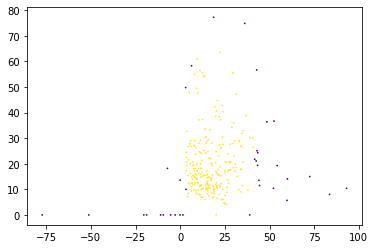

In [15]:
#使用 svc 訓練
clf_stock = SVC()
clf_stock.fit(data_stock,go)

x_stock = data_stock[:,0]
y_stock = data_stock[:,1]

Data_stock = clf.predict(data_stock)
plt.scatter(x_stock,y_stock,s=0.5,c=Data_stock)

預測正確率為：48.507463％


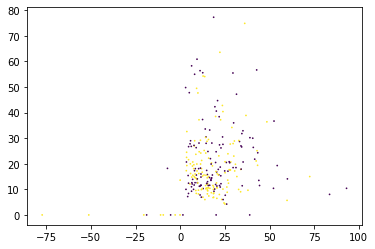

In [16]:
pre_stock = Data_stock-go
for i in range(len(pre_stock)):
    if pre_stock[i] != 0:
        pre_stock[i] = 1 
correct_stock = np.sum(pre_stock==0)
correct_stock_rate = correct_stock/len(pre_stock)
print("預測正確率為：{:6f}％".format(correct_stock_rate*100))
plt.scatter(x_stock,y_stock,s=0.5,c=pre_stock)

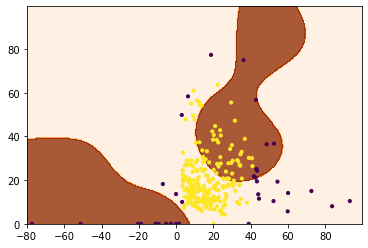

In [17]:
#用contourf將預測結果視覺化
x1, x2 = np.meshgrid(np.arange(-80,100,0.5), np.arange(0,100,0.5))
#將arange中的元素變成細密的格點的位置形式（不知道該怎麼表達，但我的理解是這樣）
Z = clf_stock.predict(np.c_[x1.ravel(), x2.ravel()])
#將每個格點做預測，ravel()可使array攤平
Z = Z.reshape(x1.shape)
#這個真的要記得轉化成這個形式，否則會出現TypeError："Input z must be 2D, not 1D"

plt.contourf(x1, x2, Z, cmap=plt.cm.Oranges, alpha=0.8)#繪製密度圖
plt.scatter(x_stock,y_stock,s=10,c=Data_stock)#繪製原本資料預測的點

### NOTE&PROBLEM：

這幾個禮拜從完全沒接觸過程式到現在學到了很多東西，  
這堂課對我來說收穫最大的是學習的樂趣與動機。  
很高興第一次接觸程式語言是用有趣的方式下去學的，  
每個禮拜都會花上好幾個小時來coding。  
謝謝老師和助教學長姐的用心備課和解惑～